In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel(r"C:\Users\TEJKIRAN\Downloads\Assignment_dataset.xlsx")
data.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


Text(0.365, 0.465, 'Points above Target Budget PR = 529/982 = 53.9%')

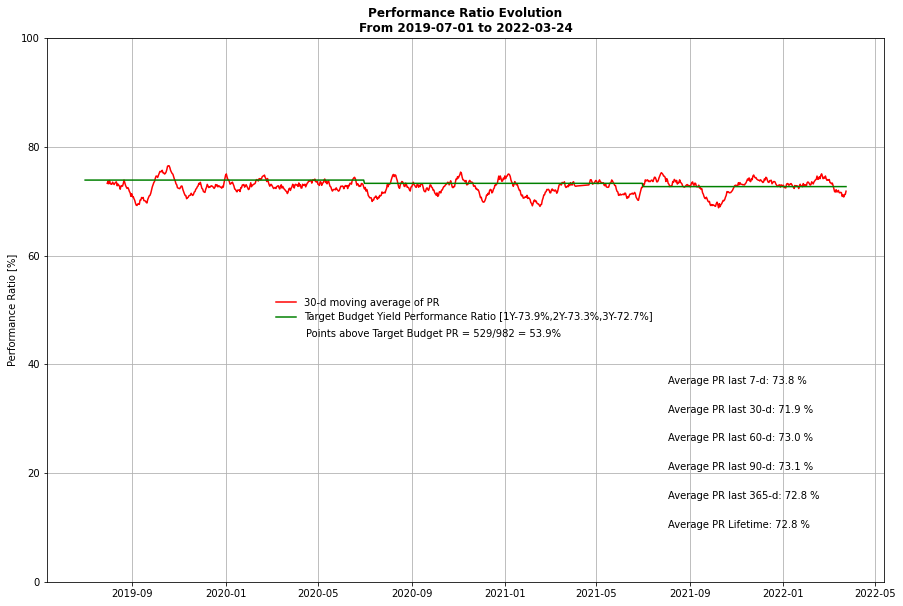

In [6]:
plt.figure(figsize=(15,10))
# plt.scatter(data["Date"],data["PR"])
plt.ylim(bottom=0,top=100)
plt.ylabel('Performance Ratio [%]')
plt.title('Performance Ratio Evolution\n' + r'From 2019-07-01 to 2022-03-24',fontweight="bold")
plt.grid()
X=[7,30,60,90,365]
Y=[]
x=0.7
y=0.4
for i in X:
    Y.append("Average PR last {i}-d: {value} %".format(i= i,value= round(data["PR"].tail(i).values.mean(),1)))
Y.append("Average PR Lifetime: {value} %".format(value= round(data["PR"].tail(i).values.mean(),1)))
for i in Y:
    plt.figtext(x,y,i)
    y-=0.04
    
ls=[]
begin_line=73.9
for i in range(3):
    ls.append(round(begin_line,1))
    begin_line-=(begin_line*0.8)/100

data['PR_moving_avg']=data["PR"].rolling(30).mean()
data['interval'] = [ls[0] if x<="2020-06-30" else ls[2] if x>"2021-06-30" else ls[1] for x in data['Date'].astype(str)]

plt.plot(data["Date"],data["PR_moving_avg"],color='red',label ='30-d moving average of PR')
plt.plot(data["Date"],data["interval"],color='green',label ='Target Budget Yield Performance Ratio [1Y-73.9%,2Y-73.3%,3Y-72.7%] ')
plt.legend(loc ="center",frameon=False)
plt.figtext(.365,.465,"Points above Target Budget PR = {Above}/{Total} = {PR}%".format(Above=(data["PR"] > begin_line).sum(),Total=data.shape[0],PR=round(((data["PR"] > begin_line).sum()/data.shape[0])*100,1)))